# Predicting Molecular Solubility Using Linear and Random Forest Regression

Loading dataset provided by Delaney, J. S. on his research paper

In [92]:
import pandas as pd
df = pd.read_csv('../data/delaney_solubility_with_descriptors.csv')

In [93]:
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


## Data Preparation

#### Seperating data as 'x and 'y'

In [94]:
y = df['logS']

In [95]:
y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64

In [96]:
x = df[['MolLogP','MolWt','NumRotatableBonds','AromaticProportion']]
x

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


In [97]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x ,y ,test_size=0.2 ,random_state=100)

#### Dataset splitting for Training and Testing Purpose in 8:2 ratio.

In [98]:
x_train

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
107,3.14280,112.216,5.0,0.000000
378,-2.07850,142.070,0.0,0.000000
529,-0.47730,168.152,0.0,0.000000
546,-0.86740,154.125,0.0,0.000000
320,1.62150,100.161,2.0,0.000000
...,...,...,...,...
802,3.00254,250.301,1.0,0.842105
53,2.13860,82.146,3.0,0.000000
350,5.76304,256.348,0.0,0.900000
79,3.89960,186.339,10.0,0.000000


In [99]:
x_test

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
822,2.91000,172.268,7.0,0.000000
118,7.27400,360.882,1.0,0.666667
347,1.94040,145.161,0.0,0.909091
1123,1.98640,119.378,0.0,0.000000
924,1.70062,108.140,0.0,0.750000
...,...,...,...,...
1114,1.76210,478.513,4.0,0.000000
427,6.32820,276.338,0.0,1.000000
711,0.04430,218.205,5.0,0.000000
4,2.91890,187.375,1.0,0.000000


## Model Building

### Linear Regression

#### Training the Model

In [100]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train , y_train)

LinearRegression()

Applying the model to make a prediction

In [101]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

In [102]:
y_lr_train_pred

array([-2.83668969,  0.84208401, -0.50930302, -0.13058053, -1.6269208 ,
       -2.86103037, -2.32208333, -4.16684323, -5.04235077, -2.29737009,
       -3.15082845, -4.33037208, -1.43700682, -2.59060064, -7.09025955,
       -2.32734557, -4.19073421, -2.63904005, -3.58104074, -3.75929058,
       -2.5501665 , -3.26968347, -2.78911367, -2.69251051, -0.77437547,
       -6.61955792, -2.99084623, -2.36975061, -7.18167736, -1.52816491,
       -4.81736265, -0.86996608, -7.09025955, -1.87404275, -2.58013247,
       -4.80953284, -4.17454084, -1.95444152, -3.50503339, -2.7411418 ,
       -1.87131835, -2.45270806, -3.07252433, -1.48988982, -3.98778754,
       -1.35216679, -0.16932277, -6.05237002, -3.29550658,  0.30513174,
       -3.25501463, -5.31993586, -0.4733928 , -4.79180882, -5.82486323,
       -2.70343539, -3.70838271, -2.4987341 , -2.12301018, -3.11393974,
       -2.79842053, -1.38274662, -4.3267103 , -3.57778946, -3.42356884,
       -9.15826626, -6.52588866, -1.75832085, -4.97842312, -1.59

In [103]:
y_lr_test_pred

array([-3.05722870e+00, -7.77785827e+00, -2.55016650e+00, -2.01523582e+00,
       -2.06375990e+00, -9.99672215e-01, -5.94603364e-01, -5.53626003e-01,
       -5.72200956e+00, -3.94006681e+00, -3.95496755e+00, -2.29737009e+00,
       -1.48980354e+00, -1.48988982e+00, -4.64510806e+00, -1.90396018e+00,
       -1.51566313e+00, -3.16424605e+00, -3.70863920e+00, -5.58105660e+00,
       -3.25038467e+00, -5.04235077e+00, -5.69194881e+00, -2.14339849e+00,
       -4.35689341e+00, -5.03964756e+00, -3.10383618e+00, -4.40286964e+00,
       -4.21276272e+00,  5.56508349e-01, -1.45537678e+00, -4.41027396e+00,
       -2.59668773e+00, -1.53336276e+00, -5.55749874e-01, -1.67111795e+00,
       -2.78163675e+00, -3.15395565e+00, -5.27083361e+00, -1.75321446e+00,
       -1.53350725e+00, -2.01255666e+00, -6.57559167e+00, -7.89433046e+00,
       -5.76437127e+00, -4.16422068e+00, -3.43694663e+00,  1.43834212e+00,
       -1.12679105e-02, -2.34521849e+00, -1.86480046e+00, -5.03964756e+00,
        8.55886378e-01, -

#### Evaluate Model Performance

In [104]:
from sklearn.metrics import mean_squared_error, r2_score

In [105]:
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [106]:
lr_results = pd.DataFrame(['Linear Regression', lr_train_mse , lr_train_r2 , lr_test_mse , lr_test_r2]).transpose()

In [107]:
lr_results

,0,1,2,3,4
0,Linear Regression,1.007536,0.764505,1.020695,0.789162


In [108]:
lr_results.columns = ['Method','Training MSE','Training R2' , 'Test MSE' , 'Testing R2']

In [109]:
lr_results

,Method,Training MSE,Training R2,Test MSE,Testing R2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162


### Random Forest

#### Training the Model

In [118]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth= 10 , random_state= 100 )
rf.fit(x_train , y_train)

RandomForestRegressor(max_depth=10, random_state=100)

#### Applying the model to make a prediction

In [111]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

#### Evaluate Model Performance

In [112]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [113]:
rf_results = pd.DataFrame(['Random Forest', rf_train_mse , rf_train_r2 , rf_test_mse , rf_test_r2]).transpose()
rf_results.columns = ['Method','Training MSE','Training R2' , 'Test MSE' , 'Testing R2']
rf_results

,Method,Training MSE,Training R2,Test MSE,Testing R2
0,Random Forest,0.124508,0.970898,0.652047,0.865311


# Model Comparison

In [114]:
combined_models = pd.concat([lr_results, rf_results], axis=0)
combined_models

,Method,Training MSE,Training R2,Test MSE,Testing R2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162
0,Random Forest,0.124508,0.970898,0.652047,0.865311


In [115]:
combined_models.reset_index(drop=True)
combined_models

,Method,Training MSE,Training R2,Test MSE,Testing R2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162
0,Random Forest,0.124508,0.970898,0.652047,0.865311


## Visualization of Predicted Value and Real Value

### Using Linear Regression

Text(0.5, 0, 'Experimental LogS')

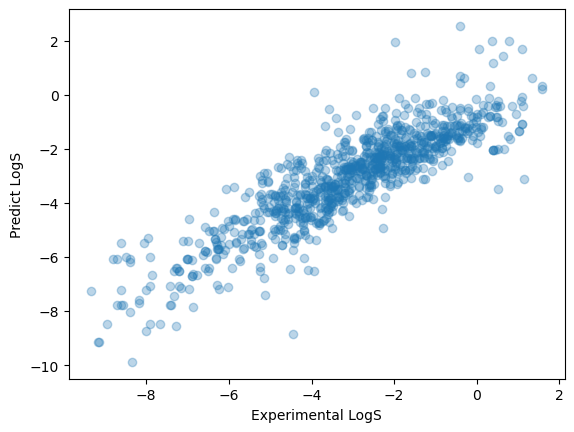

In [116]:
import matplotlib.pyplot as plt
plt.scatter ( x= y_train, y=y_lr_train_pred, alpha = 0.3 )

plt.plot()
plt.ylabel( 'Predict LogS')
plt.xlabel( 'Experimental LogS')

### Using Random Foreat Regression

Text(0, 0.5, 'Predicted LogS')

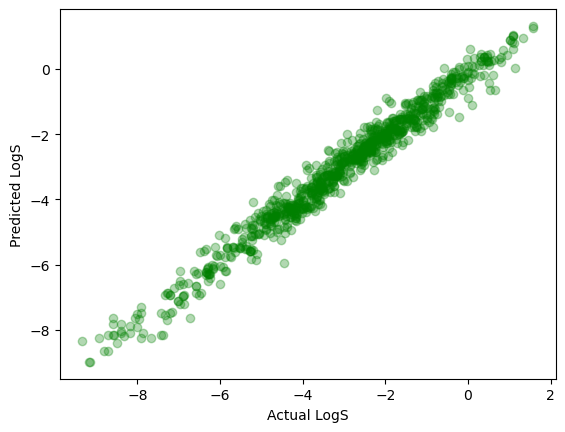

In [117]:
plt.scatter ( x = y_train , y = y_rf_train_pred , c= "green" , alpha= 0.3)
plt.plot()
plt.xlabel ('Actual LogS')
plt.ylabel ( 'Predicted LogS')

Random Forest with a depth of 10 is fairly accurate than the Linear Regression Model